In [242]:
import pandas as pd

data = pd.read_csv('games.csv')
data.columns
data.rename( columns={'Unnamed: 0':'index'}, inplace=True )

In [243]:
data[data['Times Listed'] != data['Number of Reviews']]

,index,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [244]:
data = data.drop(columns='Times Listed')

In [245]:
data = data.drop(columns='Reviews')

,index,Title,Release Date,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
326,326,Elden Ring,"Feb 25, 2022",4.5,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
327,327,Hades,"Dec 10, 2019",4.3,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
328,328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.4,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
329,329,Undertale,"Sep 15, 2015",4.2,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
330,330,Hollow Knight,"Feb 24, 2017",4.4,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...
1268,1268,Bloodstained: Curse of the Moon,"May 23, 2018",3.6,341,"['Adventure', 'Indie', 'Platform']",2.3K,41,800,397
1269,1269,Final Fantasy XIII-2,"Dec 15, 2011",3.3,482,"['Adventure', 'RPG']",2.3K,58,1.4K,449
1270,1270,Agar.io,"Apr 28, 2015",2.2,81,"['Indie', 'Strategy']",4.4K,8,40,12
1271,1271,Fatal Frame II: Crimson Butterfly,"Nov 27, 2003",4.2,398,['Adventure'],1K,38,690,513


In [246]:
data[data.duplicated(subset=["Title", "Release Date"])]

In [247]:
data = data.drop_duplicates(subset=["Title", "Release Date"])

,index,Title,Release Date,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
5,5,Minecraft,"Nov 18, 2011",4.3,2.3K,"['Adventure', 'Simulator']",33K,1.8K,1.1K,230
925,925,Minecraft,"Sep 20, 2017",4.2,571,"['Adventure', 'Simulator']",11K,509,412,85


In [248]:
data[data.Title == "Minecraft"]

In [249]:
data = data.drop(columns='Team')

array([4.5, 4.3, 4.4, 4.2, 3. , 3.7, 4.1, 3.8, 3.3, 4.6, 2.6, 3.9, 4. ,
       2.7, 3.6, 3.5, 3.2, 2.8, 2.1, 3.4, 3.1, 2.9, 2.5, 1.9, 2.4, 2.3,
       nan, 1.2, 2.2, 1.6, 1.5, 2. , 1.4, 0.7, 1.8])

In [250]:
data

,index,Title,Release Date,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,2023,NaN,422,['RPG'],37,10,732,2.4K
713,713,Final Fantasy VII Rebirth,2023,NaN,192,[],20,3,354,1.1K
719,719,Lies of P,2023,NaN,175,['RPG'],5,0,260,939
726,726,Judas,2025,NaN,90,"['Adventure', 'Shooter']",1,0,92,437
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,2023,NaN,118,"['Adventure', 'Brawler', 'RPG']",2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,2023,NaN,581,"['Adventure', 'RPG']",72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,2023,NaN,250,['Adventure'],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,2023,NaN,51,"['Adventure', 'Puzzle']",3,0,74,291
1202,1202,Earthblade,2024,NaN,83,"['Adventure', 'Indie', 'RPG']",0,1,103,529
1305,1305,Diablo IV,2023,NaN,148,"['Brawler', 'RPG']",19,10,179,677


In [251]:
from datetime import datetime

date_format = "%b %d, %Y"

for x in data.index:
    date_string = data["Release Date"][x]
    if date_string == "releases on TBD":
        data = data.drop([x])
    else:
        parsed_date = datetime.strptime(date_string, date_format).date().year
        data.at[x, "Release Date"] = parsed_date


,index,Title,Release Date,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022,4.5,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,1,Hades,2019,4.3,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017,4.4,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,3,Undertale,2015,4.2,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,4,Hollow Knight,2017,4.4,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010,3.2,94,"['Adventure', 'Point-and-Click']",763,5,223,67
1508,1508,Team Sonic Racing,2019,2.9,264,"['Arcade', 'Racing']",1.5K,49,413,107
1509,1509,Dragon's Dogma,2012,3.7,210,"['Brawler', 'RPG']",1.1K,45,487,206
1510,1510,Baldur's Gate 3,2020,4.1,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...",269,79,388,602


In [251]:


data.Rating.unique()

In [251]:


import math

data[(data.Rating).isna()]


In [252]:
data = data.dropna(subset=["Rating"])
data

/var/folders/p2/fbtp60v17j57gw49pbkjyw500000gn/T/ipykernel_1502/2082004475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Number of Reviews"][x] = convert_string_to_int(data["Number of Reviews"][x])
/var/folders/p2/fbtp60v17j57gw49pbkjyw500000gn/T/ipykernel_1502/2082004475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Plays[x] = convert_string_to_int(data.Plays[x])
/var/folders/p2/fbtp60v17j57gw49pbkjyw500000gn/T/ipykernel_1502/2082004475.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [253]:
data = data.drop(columns = 'Summary')

,index,Title,Release Date,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022,4.5,3900,"['Adventure', 'RPG']",17000,3800,4600,4800
1,1,Hades,2019,4.3,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,2017,4.4,4300,"['Adventure', 'RPG']",30000,2500,5000,2600
3,3,Undertale,2015,4.2,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000,679,4900,1800
4,4,Hollow Knight,2017,4.4,3000,"['Adventure', 'Indie', 'Platform']",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010,3.2,94,"['Adventure', 'Point-and-Click']",763,5,223,67
1508,1508,Team Sonic Racing,2019,2.9,264,"['Arcade', 'Racing']",1500,49,413,107
1509,1509,Dragon's Dogma,2012,3.7,210,"['Brawler', 'RPG']",1100,45,487,206
1510,1510,Baldur's Gate 3,2020,4.1,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...",269,79,388,602


In [254]:
data

In [256]:
def convert_string_to_int(string):
    if string[-1] == "K":
        return int(float(string[:-1]) * 1000)
    else:
        return int(string)

for x in data.index:
    data["Number of Reviews"][x] = convert_string_to_int(data["Number of Reviews"][x])
    data.Plays[x] = convert_string_to_int(data.Plays[x])
    data.Playing[x] = convert_string_to_int(data.Playing[x])
    data.Backlogs[x] = convert_string_to_int(data.Backlogs[x])
    data.Wishlist[x] = convert_string_to_int(data.Wishlist[x])

,index,Title,Release Date,Genres,Popularity
0,0,Elden Ring,2022,"['Adventure', 'RPG']",90585.0
1,1,Hades,2019,"['Adventure', 'Brawler', 'Indie', 'RPG']",98470.0
2,2,The Legend of Zelda: Breath of the Wild,2017,"['Adventure', 'RPG']",127380.0
3,3,Undertale,2015,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",106087.8
4,4,Hollow Knight,2017,"['Adventure', 'Indie', 'Platform']",98780.0
...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010,"['Adventure', 'Point-and-Click']",2256.32
1508,1508,Team Sonic Racing,2019,"['Arcade', 'Racing']",4120.03
1509,1509,Dragon's Dogma,2012,"['Brawler', 'RPG']",4193.21
1510,1510,Baldur's Gate 3,2020,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...",2244.75


In [257]:
data

array([6, 7, 9, 8, 2, 3, 4, 5, 1, 0])

In [258]:

data = data.assign(Popularity= data.Rating*( 0.1 * data["Number of Reviews"] + 0.8 * data.Plays + 1 * data.Playing + 0.3 * data.Backlogs + 0.2 * data.Wishlist))


,index,Title,Release Date,Genres,Popularity,Popularity Class,Words in title
0,0,Elden Ring,2022,"['Adventure', 'RPG']",90585.0,6,2
1,1,Hades,2019,"['Adventure', 'Brawler', 'Indie', 'RPG']",98470.0,7,1
2,2,The Legend of Zelda: Breath of the Wild,2017,"['Adventure', 'RPG']",127380.0,9,8
3,3,Undertale,2015,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",106087.8,8,1
4,4,Hollow Knight,2017,"['Adventure', 'Indie', 'Platform']",98780.0,7,2
...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010,"['Adventure', 'Point-and-Click']",2256.32,0,6
1508,1508,Team Sonic Racing,2019,"['Arcade', 'Racing']",4120.03,0,3
1509,1509,Dragon's Dogma,2012,"['Brawler', 'RPG']",4193.21,0,2
1510,1510,Baldur's Gate 3,2020,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...",2244.75,0,3


In [259]:
data

In [260]:
from sklearn.preprocessing import OneHotEncoder
data = data.drop(columns = ['Number of Reviews','Plays', 'Playing', 'Backlogs', 'Wishlist', 'Rating'])





In [261]:
data

/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Use

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                           100],
                         'preprocessing': [StandardScaler(), None]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=weighted))

In [262]:
import numpy as np
popularity_bins = np.linspace(0, 130000, 11)

data['Popularity Class'] = pd.cut(data['Popularity'], bins=popularity_bins, labels=False, right=False)

data['Popularity Class'].unique()

tf.Tensor(
[0. 0. 0. 0. 5. 0. 2. 1. 1. 1. 5. 4. 0. 0. 1. 1. 2. 0. 0. 3. 0. 1. 0. 0.
 0. 1. 3. 0. 0. 2. 0. 0. 3. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 2. 2.
 0. 0. 0. 0. 0. 0. 3. 0. 1. 0. 1. 0. 2. 0. 1. 0. 0. 0. 2. 1. 2. 0. 2. 0.
 0. 0. 2. 4. 3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 3. 0. 1. 4. 0. 4.
 1. 1. 0. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 4. 1. 0. 0. 1. 0.
 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 6. 0. 1. 0. 3. 2. 0. 0. 0. 1. 2. 0.
 0. 2. 0. 2. 1. 0. 0. 0. 0. 1. 2. 6. 0. 1. 3. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 2. 0. 0. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 2. 0. 1. 4. 0. 0. 0. 4. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 3. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0. 0.
 2. 1. 0. 1. 2. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 0.
 6. 0. 2. 0. 0. 0. 0. 2. 1. 0. 4. 0. 0. 0. 3. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 1. 0. 5. 0. 1. 1. 2. 0. 0. 0. 2. 1. 1. 0. 0. 1. 2. 1. 5. 5.
 1. 0. 0. 0. 0. 0. 0. 0. 2. 6. 0. 3. 1. 

SVM rbf
Precision score: 0.3772193596248238
Recall score: 0.5
F1 score: 0.41469393767673435
Accuracy score: 0.5
SVM linear
Precision score: 0.05220165782202535
Recall score: 0.22847682119205298
F1 score: 0.08498598739758305
Accuracy score: 0.22847682119205298
SVM poly
Precision score: 0.3475148121639325
Recall score: 0.4602649006622517
F1 score: 0.3885111345755343
Accuracy score: 0.4602649006622517
LogisticRegression
Precision score: 0.34610927152317883
Recall score: 0.47019867549668876
F1 score: 0.3902701967738408
Accuracy score: 0.47019867549668876
Neural Network
10/10 [==============================] - 0s 794us/step
Precision score: 0.2737160650848647
Recall score: 0.5231788079470199
F1 score: 0.3594010941549093
Accuracy score: 0.5231788079470199


/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

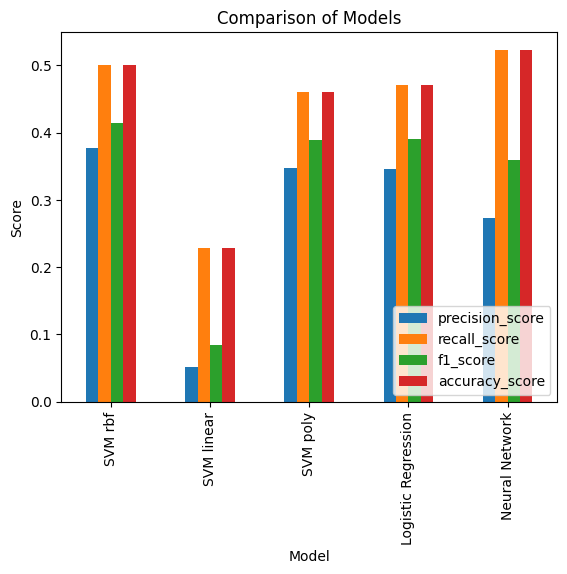

In [263]:
data['Words in title'] = data['Title'].apply(lambda x: len(x.split()))

data

In [218]:
data['Release Date']

data = data.reset_index(drop=True)


SVM rbf
Precision score: 0.3772193596248238
Recall score: 0.5
F1 score: 0.41469393767673435
Accuracy score: 0.5
SVM linear
Precision score: 0.05220165782202535
Recall score: 0.22847682119205298
F1 score: 0.08498598739758305
Accuracy score: 0.22847682119205298
SVM poly
Precision score: 0.3475148121639325
Recall score: 0.4602649006622517
F1 score: 0.3885111345755343
Accuracy score: 0.4602649006622517
LogisticRegression
Precision score: 0.34610927152317883
Recall score: 0.47019867549668876
F1 score: 0.3902701967738408
Accuracy score: 0.47019867549668876
Neural Network
10/10 [==============================] - 0s 766us/step
Precision score: 0.2737160650848647
Recall score: 0.5231788079470199
F1 score: 0.3594010941549093
Accuracy score: 0.5231788079470199


/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

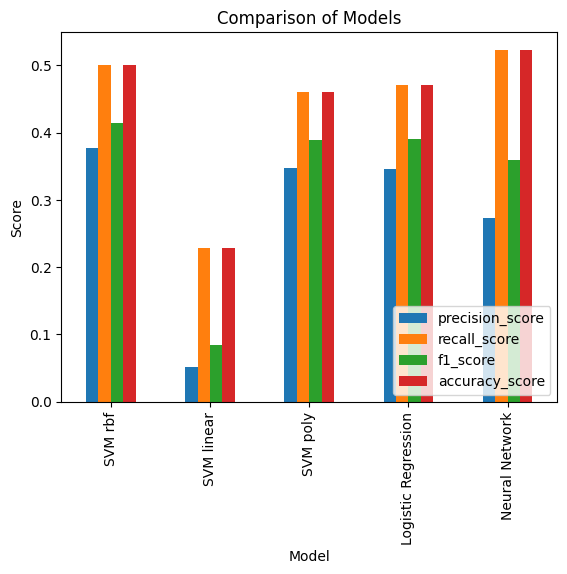

In [219]:
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

data = data.sample(frac = 1)


mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(data['Genres'])

genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

data_encoded = pd.concat([data[['Words in title']],data[['Release Date']], genres_encoded_df], axis=1)


X = data_encoded.values

y = data['Popularity Class'].values




X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

y_val, y_test = y_test[:400], y_test[400:]
X_val, X_test = X_test[:400], X_test[400:]

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

np.random.seed(1)

seed = 123
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

pipe_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', svm.LinearSVC())])
pipe_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', svm.SVC(kernel='poly'))])
pipe_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(max_iter=500))])

param_grid_1 = {'preprocessing': [StandardScaler(), None],
                'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_2 = {'preprocessing': [StandardScaler(), None],
                'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_3 = {'preprocessing': [StandardScaler(), None],
                'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'classifier__degree': [1, 3, 7, 15, 30]}

print(y_train)
print(X_train)

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold, return_train_score=True)
grid_1.fit(X_train, y_train)

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)

scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='weighted')

grid_4 = GridSearchCV(pipe_4, param_grid_2, scoring=scorer, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)









In [167]:
import pandas as pd

from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras import Sequential

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
X_val = tf.constant(X_val, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)
y_val = tf.constant(y_val, dtype=tf.float32)


print(y_val)
print(y_test)
print(y_train)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)


modelNN = Sequential()
modelNN.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
modelNN.add(Dense(50, activation="sigmoid"))
modelNN.add(Dense(20, activation="sigmoid"))
modelNN.add(Dense(10, activation="sigmoid"))
modelNN.summary()

modelNN.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)
modelNN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, callbacks=[early_stopping])

evaluation = modelNN.evaluate(X_test, y_test)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

tf.Tensor(
[0. 0. 0. 0. 5. 0. 2. 1. 1. 1. 5. 4. 0. 0. 1. 1. 2. 0. 0. 3. 0. 1. 0. 0.
 0. 1. 3. 0. 0. 2. 0. 0. 3. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 2. 2.
 0. 0. 0. 0. 0. 0. 3. 0. 1. 0. 1. 0. 2. 0. 1. 0. 0. 0. 2. 1. 2. 0. 2. 0.
 0. 0. 2. 4. 3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 3. 0. 1. 4. 0. 4.
 1. 1. 0. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 4. 1. 0. 0. 1. 0.
 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 6. 0. 1. 0. 3. 2. 0. 0. 0. 1. 2. 0.
 0. 2. 0. 2. 1. 0. 0. 0. 0. 1. 2. 6. 0. 1. 3. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 2. 0. 0. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 2. 0. 1. 4. 0. 0. 0. 4. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 3. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0. 0.
 2. 1. 0. 1. 2. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 0.
 6. 0. 2. 0. 0. 0. 0. 2. 1. 0. 4. 0. 0. 0. 3. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 1. 0. 5. 0. 1. 1. 2. 0. 0. 0. 2. 1. 1. 0. 0. 1. 2. 1. 5. 5.
 1. 0. 0. 0. 0. 0. 0. 0. 2. 6. 0. 3. 1. 

SVM rbf
Precision score: 0.3772193596248238
Recall score: 0.5
F1 score: 0.41469393767673435
Accuracy score: 0.5
SVM linear
Precision score: 0.05220165782202535
Recall score: 0.22847682119205298
F1 score: 0.08498598739758305
Accuracy score: 0.22847682119205298
SVM poly
Precision score: 0.3475148121639325
Recall score: 0.4602649006622517
F1 score: 0.3885111345755343
Accuracy score: 0.4602649006622517
LogisticRegression
Precision score: 0.34610927152317883
Recall score: 0.47019867549668876
F1 score: 0.3902701967738408
Accuracy score: 0.47019867549668876
Neural Network
10/10 [==============================] - 0s 800us/step
Precision score: 0.2737160650848647
Recall score: 0.5231788079470199
F1 score: 0.3594010941549093
Accuracy score: 0.5231788079470199


/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piotrbednarski/Desktop/Studia_Archiwum/AI/AI_Project/Project/venv/include/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

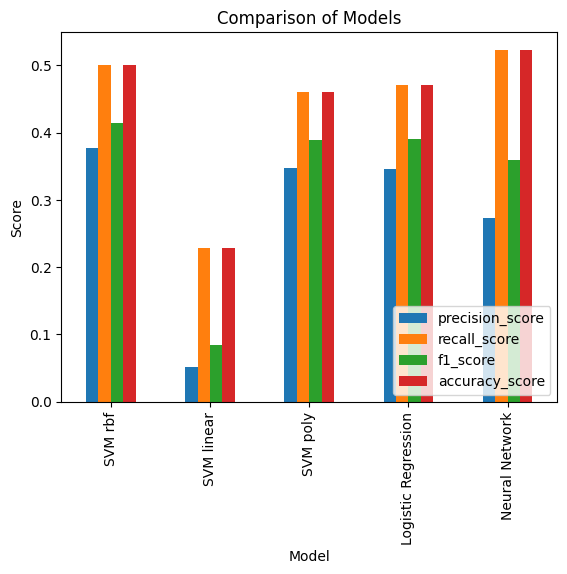

In [168]:

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('LogisticRegression', grid_4.best_estimator_))
models.append(('Neural Network', modelNN))

metrics_dict = {'precision_score': [],
                'recall_score': [],
                'f1_score': [],
                'accuracy_score': []}

y_test_classes = np.argmax(y_test, axis=1)

for name, model in models:
    print(name)
    if name == 'Neural Network':
        y_pred = np.argmax(model.predict(X_test), axis=1)
    else:
        y_pred = model.predict(X_test)

    precision = metrics.precision_score(y_test_classes, y_pred, average='weighted')
    recall = metrics.recall_score(y_test_classes, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test_classes, y_pred, average='weighted')
    accuracy = metrics.accuracy_score(y_test_classes, y_pred)

    print("Precision score:", precision)
    print("Recall score:", recall)
    print("F1 score:", f1)
    print("Accuracy score:", accuracy)

    metrics_dict['precision_score'].append(precision)
    metrics_dict['recall_score'].append(recall)
    metrics_dict['f1_score'].append(f1)
    metrics_dict['accuracy_score'].append(accuracy)

df = pd.DataFrame(data=metrics_dict, index=['SVM rbf', 'SVM linear', 'SVM poly', 'Logistic Regression', 'Neural Network'])

df.plot(kind='bar')
plt.title('Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()
